Q1. How can you create a Bokeh plot using Python code?

        Bokeh is a Python library that is used to create interactive visualizations in web browsers. To create a Bokeh plot using Python code, follow the steps below:
        1.) Install the Bokeh library by running the following command in your terminal or command prompt.
        2.) Import the necessary modules.
        3.) Create a new figure object using the figure() function.
        4.) Add data to the plot using the various glyph methods available, such as line(), scatter(), or circle(). For example, to add a line to the plot:
        5.) Specify the output file for the plot using the output_file() function.
        6.) Display the plot using the show() function.

In [1]:
from bokeh.plotting import figure, output_file, show
p = figure(title="My Plot", x_axis_label="X", y_axis_label="Y")

x=[2,3,4,5,6]
y=[3,4,5,6,7]
output_file("line.html")
p=figure(title='line plot')
p.line(x,y)
show(p)

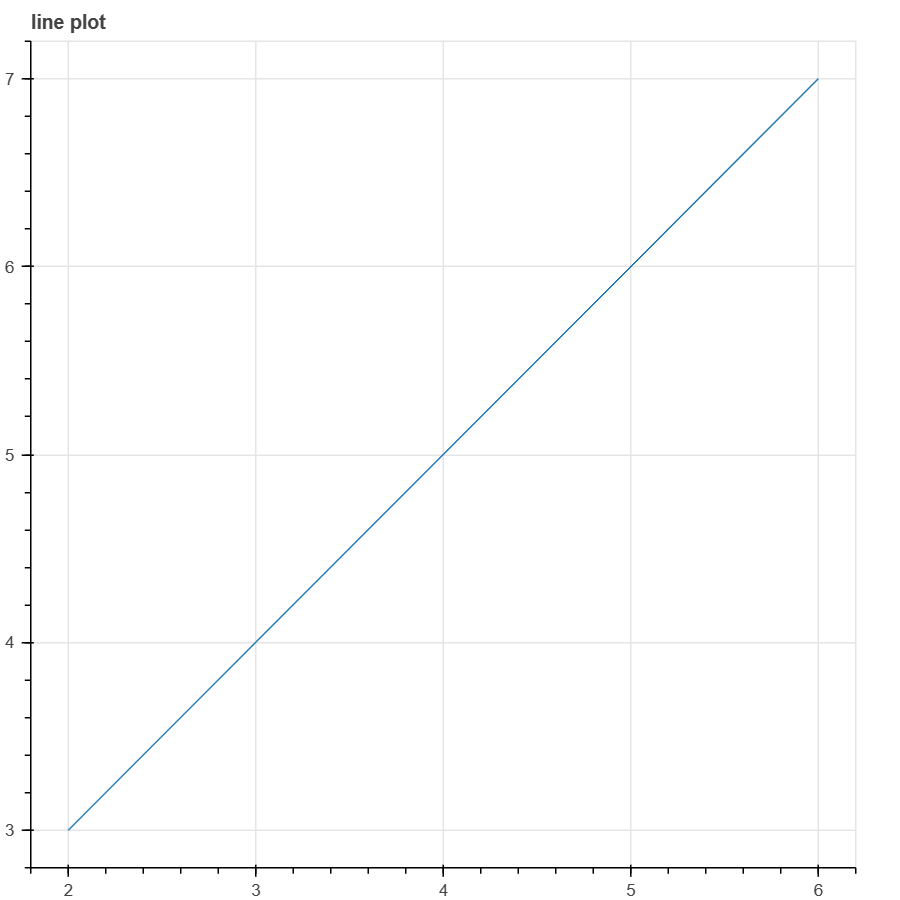

In [2]:
from IPython import display
display.Image("bokeh_plot1.png")

Q2. What are glyphs in Bokeh, and how can you add them to a Bokeh plot? Explain with an example.

        In Bokeh, a glyph is a graphical shape that represents the data in the plot. Examples of glyphs include lines, circles, squares, and triangles. You can add glyphs to a Bokeh plot using the various glyph methods available in the figure object.
        Here's an example of how to add a circle glyph to a Bokeh plot:

In [3]:
from bokeh.plotting import figure, output_file, show
p = figure(title="My Plot", x_axis_label="X", y_axis_label="Y")

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
p.circle(x, y, size=10, color='navy', alpha=0.5)

output_file("myplot.html")

show(p)


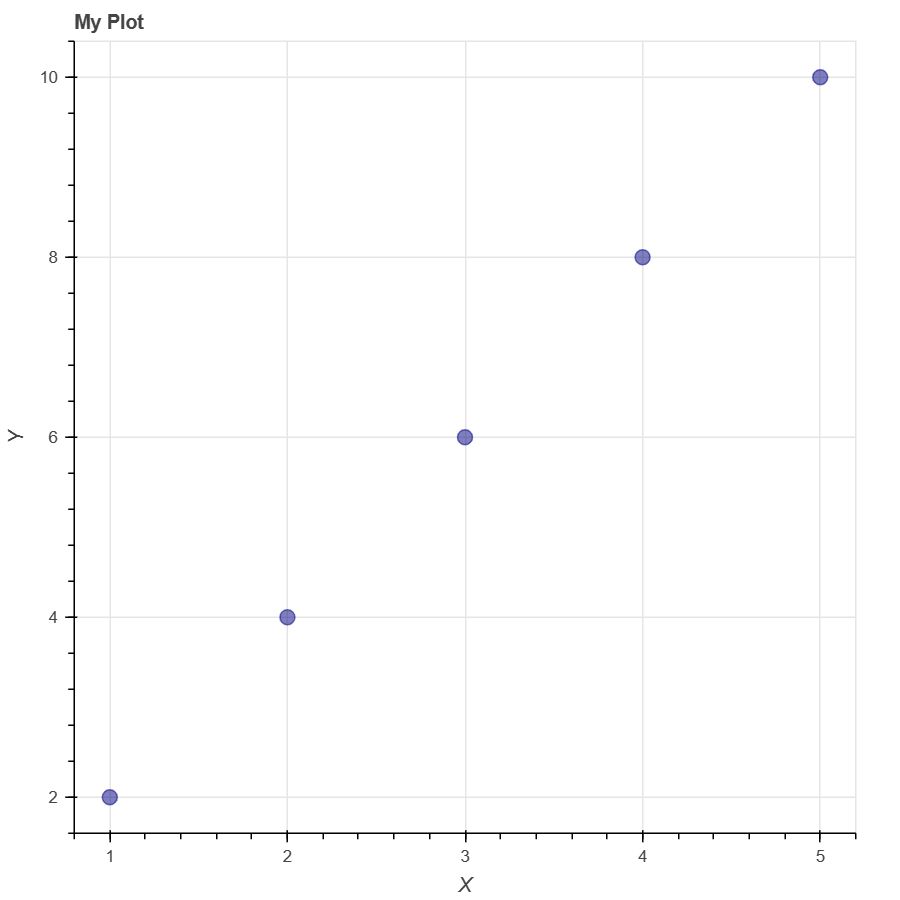

In [4]:
from IPython import display
display.Image("bokeh_plot2.png")

Q3. How can you customize the appearance of a Bokeh plot, including the axes, title, and legend?

        Bokeh provides various options to customize the appearance of a plot, including the axes, title, and legend. Here are some ways to customize these elements:
        Axes: To customize the appearance of the axes in a Bokeh plot, you can modify various properties of the Axis objects, such as their labels, tick marks, and grid lines. For example, to change the font size of the x-axis label.
        To remove the y-axis grid lines.
        Title: You can customize the appearance of the plot title by modifying the properties of the Title object. For example, to change the font size and color of the title.
        Legend: Bokeh provides a Legend object to add a legend to the plot. You can customize the appearance of the legend by modifying the properties of the Legend object, such as its title, location, and font size. For example, to change the font size of the legend labels.

In [5]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Title

p = figure(title="My Plot", x_axis_label="X", y_axis_label="Y")

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
p.circle(x, y, size=10, color='navy', alpha=0.5, legend_label="Circle")


p.xaxis.axis_label_text_font_size = "14pt"
p.yaxis.axis_label_text_font_style = "italic"
p.xaxis.major_label_text_color = "orange"
p.ygrid.grid_line_color = None

p.title.text_font_size = "16pt"
p.title.text_color = "navy"
p.title.align = "center"
p.title.offset = 20

p.legend.location = "top_left"
p.legend.title = "Glyphs"
p.legend.label_text_font_size = "12pt"

output_file("myplot.html")
show(p)


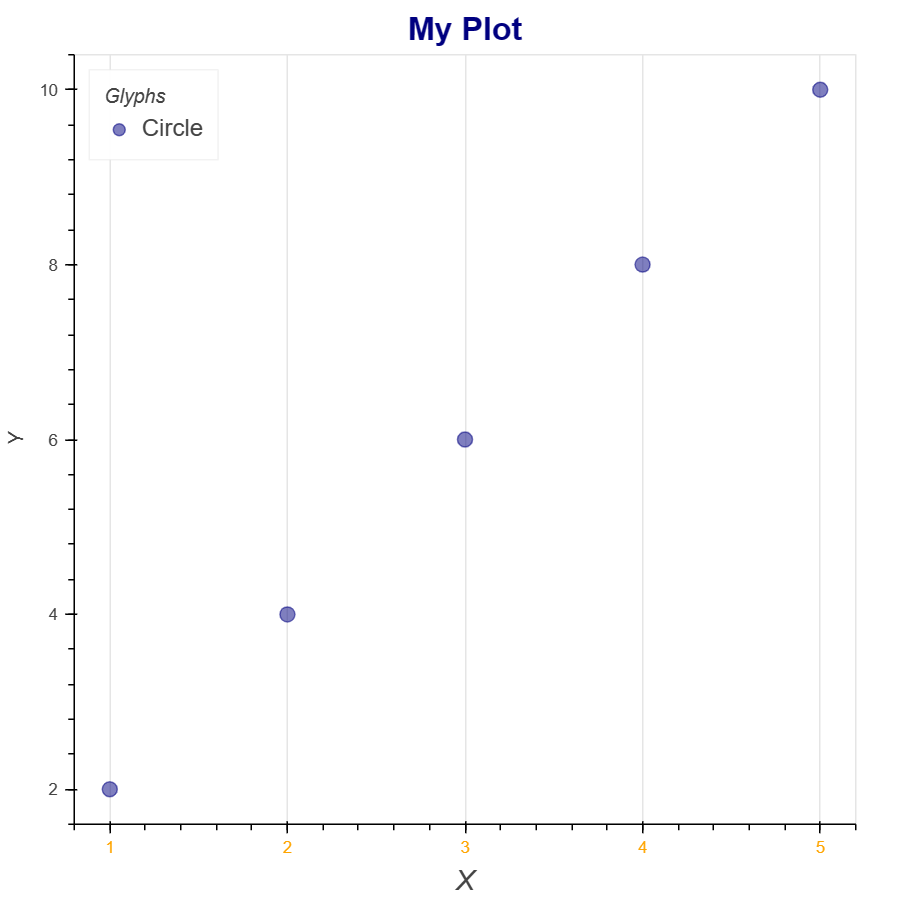

In [6]:
from IPython import display
display.Image("bokeh_plot3.png")

Q4. What is a Bokeh server, and how can you use it to create interactive plots that can be updated in
real time?

        A Bokeh server is a Python process that runs a Bokeh application, which is a web-based interface for creating and interacting with Bokeh plots. The Bokeh server allows you to create dynamic, interactive plots that can be updated in real time, based on user input or data changes.
        To create a Bokeh application, you define a curdoc() object, which represents the document containing the Bokeh plot, and then create a figure object and add glyphs to it, just as you would with a static Bokeh plot. You can then define one or more callbacks that respond to user input or data changes, and update the plot accordingly.
        When we run this code with the Bokeh server, a web page is created that displays the plot and the button widget. Clicking the button generates new random data and updates the plot in real time. 
Here's an example of how to use the Bokeh server to create an interactive plot that can be updated in real time:

In [9]:
from bokeh.plotting import figure, curdoc
from bokeh.models import ColumnDataSource
from bokeh.layouts import column
from bokeh.models import Button, CustomJS
import numpy as np

# Create a figure and data source
source = ColumnDataSource(data=dict(x=[], y=[]))
p = figure(min_height=200, min_width=400, tools="crosshair,pan,reset,save")
p.line('x', 'y', source=source, line_width=2)

# Define a callback function to update the plot
def update_data():
    new_data = dict(x=np.random.random(10), y=np.random.random(10))
    source.data = new_data

# Add a button widget that triggers the callback
button = Button(label="Update Data")
button.on_click(update_data)

# Add the button and plot to the current document
curdoc().add_root(column(button, p))


Q5. How can you embed a Bokeh plot into a web page or dashboard using Flask or Django?

        Bokeh provides several options for embedding Bokeh plots into web applications built with Flask or Django. Here's how you can embed a Bokeh plot using each framework:
        Flask:::::::::
                    To embed a Bokeh plot into a Flask web application, you can create a route that returns the HTML code for the plot using the components() function from the bokeh.embed module. 

        Django:::::::::
                    To embed a Bokeh plot into a Django web application, you can create a view that returns the HTML code for the plot using the components() function from the bokeh.embed module.

In [12]:
from flask import Flask, render_template
from bokeh.plotting import figure
from bokeh.embed import components

app = Flask(__name__)

@app.route('/')
def index():
    # Create a Bokeh plot
    p = figure()
    p.line([1, 2, 3], [4, 5, 6])

    # Get the script and div components for the plot
    script, div = components(p)

    # Render the HTML template with the script and div components
    return render_template('index.html', script=script, div=div)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [11]:
from django.shortcuts import render
from bokeh.plotting import figure
from bokeh.embed import components

def index(request):
    # Create a Bokeh plot
    p = figure()
    p.line([1, 2, 3], [4, 5, 6])

    # Get the script and div components for the plot
    script, div = components(p)

    # Render the template with the script and div components
    return render(request, 'index.html', {'script': script, 'div': div})
